In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [40]:
# Cargar datos
df = pd.read_csv("Car details v3.csv")

# Paso 1: Análisis exploratorio
print(df.head())
print(df.info())
print(df.describe())
print("Valores nulos:\n", df.isnull().sum())
print("Duplicados:", df.duplicated().sum())
print("Correlaciones:\n", df.corr(numeric_only=True))


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [46]:
# Paso 2: Preprocesamiento
df = df.drop_duplicates()
df = df.dropna(subset=['mileage', 'engine', 'max_power'])

df['mileage'] = df['mileage'].astype(str).str.replace(' kmpl', '', regex=False)
df['engine'] = df['engine'].astype(str).str.replace(' CC', '', regex=False)
df['max_power'] = df['max_power'].astype(str).str.replace(' bhp', '', regex=False)

df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

df['mileage'] = df['mileage'].fillna(df['mileage'].median())
df['engine'] = df['engine'].fillna(df['engine'].median())
df['max_power'] = df['max_power'].fillna(df['max_power'].median())

le = LabelEncoder()
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    df[col] = le.fit_transform(df[col])

In [48]:
# Paso 3: Selección de características
X = df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power']]
y = df['selling_price']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
X_selected = X[selected_features]


In [50]:
# Paso 4: División de datos
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Paso 5: Entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 6: Evaluación
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)
print("RMSE:", rmse)
print("MSE:", mse)

R2 Score: 0.6665659298029887
RMSE: 242399.85317793218
MSE: 58757688820.68308


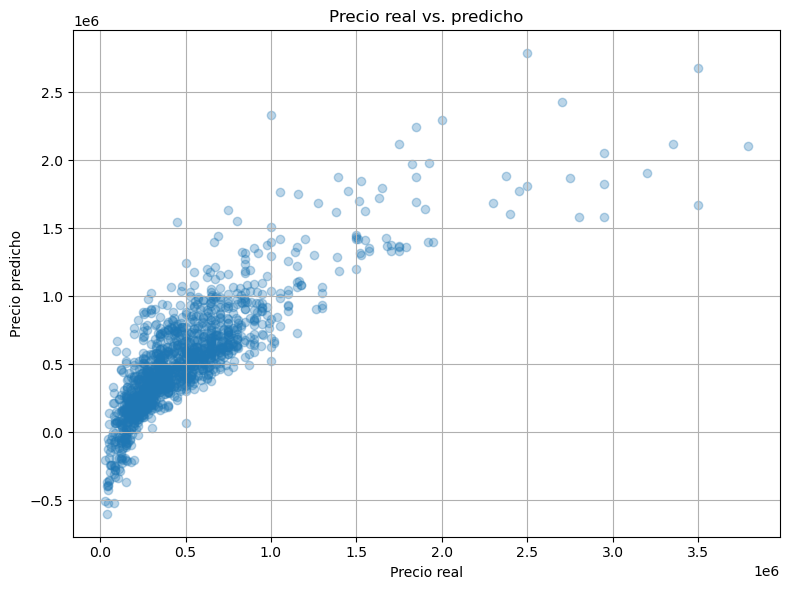

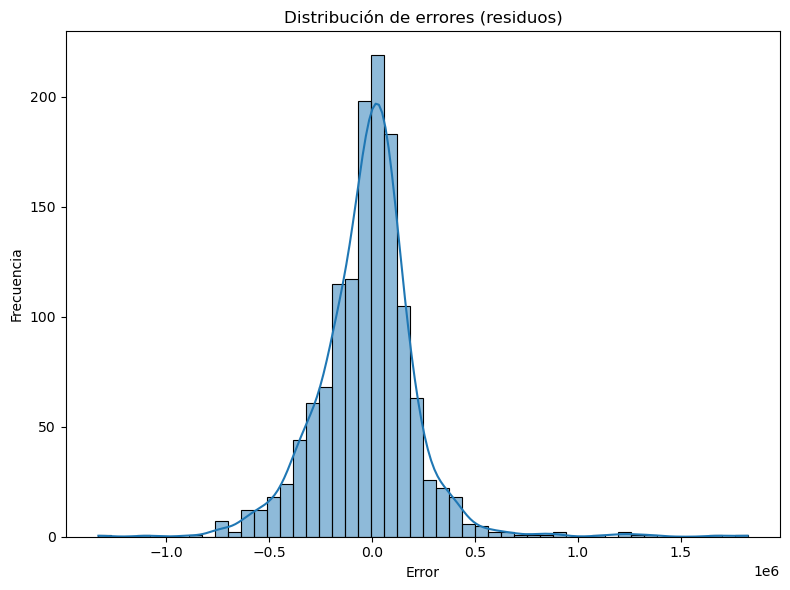

In [52]:
# Paso 7: Gráficas
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precio real vs. predicho")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, bins=50, kde=True)
plt.title("Distribución de errores (residuos)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

In [54]:
# Paso 8: Interpretación
print("\nCaracterísticas seleccionadas:", list(selected_features))
print("Coeficientes del modelo:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef}")
print("Intercepto:", model.intercept_)


Características seleccionadas: ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power']
Coeficientes del modelo:
year: 34097.70393172351
km_driven: -0.6291490242790037
fuel: -25842.89006373188
seller_type: -126977.94571912449
transmission: -329783.2879005975
owner: -13799.55194090599
mileage: 5321.222804043524
engine: 66.72698935296319
max_power: 8955.44032583063
Intercepto: -68589964.4337729
